# "Create 3d nft art"
> "Generate 3d wall art"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Riyadh Uddin
- categories: [python, jupyter, tensorflow, nft, art, GAN]

In [3]:
!pip3 install numpy-stl

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for numpy-stl: filename=numpy_stl-2.16.3-py3-none-any.whl size=18681 sha256=9a1339fe04fa5e4b9a400e52aeaae2632b06e34a24894e7b725bd0e5682974aa
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\7b\88\2c\67664b1fdf39d3893438773487d822a54396ce35e906f0cc10
Successfully built numpy-stl


In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [6]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        print(vertices[f[j],:])
        cube.vectors[i][j] = vertices[f[j]]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

[-1 -1 -1]
[-1  1 -1]
[ 1 -1 -1]
[ 1 -1 -1]
[-1  1 -1]
[ 1  1 -1]
[-1 -1 -1]
[-1 -1  1]
[-1  1  1]
[-1 -1 -1]
[-1  1  1]
[-1  1 -1]
[-1 -1  1]
[ 1 -1  1]
[1 1 1]
[-1 -1  1]
[1 1 1]
[-1  1  1]
[ 1 -1  1]
[ 1 -1 -1]
[ 1  1 -1]
[ 1 -1  1]
[ 1  1 -1]
[1 1 1]
[ 1  1 -1]
[-1  1 -1]
[1 1 1]
[-1  1 -1]
[-1  1  1]
[1 1 1]
[-1 -1 -1]
[ 1 -1 -1]
[ 1 -1  1]
[-1 -1 -1]
[ 1 -1  1]
[-1 -1  1]


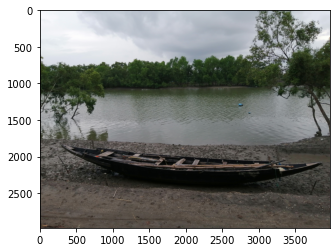

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open("data/images/ctl.jpg")
plt.imshow(im)

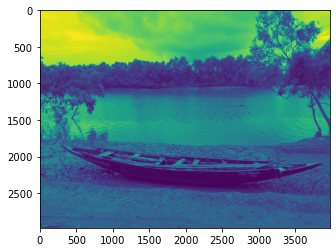

In [8]:
grey_img = Image.open('data/images/ctl.jpg').convert('L')
plt.imshow(grey_img)

In [9]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1]])

# Define the 12 triangles composing the cube
faces = np.array([\
    [1,2,3],
    [3,1,0]
])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('surface.stl')

In [10]:
grey_img = Image.open('data/images/ctl.jpg').convert('L')

max_size=(500,500)
max_height=10
min_height=0

#height=0 for minPix
#height=maxHeight for maxPIx

grey_img.thumbnail(max_size)
imageNp = np.array(grey_img)
maxPix=imageNp.max()
minPix=imageNp.min()



print(imageNp)
(ncols,nrows)=grey_img.size

vertices=np.zeros((nrows,ncols,3))

for x in range(0, ncols):
  for y in range(0, nrows):
    pixelIntensity = imageNp[y][x]
    z = (pixelIntensity * max_height) / maxPix
    #print(imageNp[y][x])
    vertices[y][x]=(x, y, z)

faces=[]

for x in range(0, ncols - 1):
  for y in range(0, nrows - 1):
    # create face 1
    vertice1 = vertices[y][x]
    vertice2 = vertices[y+1][x]
    vertice3 = vertices[y+1][x+1]
    face1 = np.array([vertice1,vertice2,vertice3])

    # create face 2 
    vertice1 = vertices[y][x]
    vertice2 = vertices[y][x+1]
    vertice3 = vertices[y+1][x+1]

    face2 = np.array([vertice1,vertice2,vertice3])

    faces.append(face1)
    faces.append(face2)

print(f"number of faces: {len(faces)}")
facesNp = np.array(faces)
# Create the mesh
surface = mesh.Mesh(np.zeros(facesNp.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        surface.vectors[i][j] = facesNp[i][j]
# Write the mesh to file "cube.stl"
surface.save('surface.stl')
print(surface)

[[248 248 248 ... 228 228 227]
 [249 248 248 ... 228 228 228]
 [249 248 249 ... 228 228 228]
 ...
 [ 62  60  62 ...  77  72  70]
 [ 53  56  61 ...  79  76  75]
 [ 53  59  61 ...  76  70  74]]
number of faces: 373252


In [11]:
a = np.zeros((3, 3))
a[:,0]=3
print(a[:,0])

print(a)


[3. 3. 3.]
[[3. 0. 0.]
 [3. 0. 0.]
 [3. 0. 0.]]


In [14]:
! pip install jupyter-cadquery==2.2.1 matplotlib

In [17]:
# run cadquery 2.2.1 example jupyter notebook
import cadquery as cq
import cadquery.freecad_impl as cadfc
import matplotlib.pyplot as plt


ImportError: cadquery was unable to determine freecad library path

In [16]:
! pip install vpython

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached txaio-21.2.1-py2.py3-none-any.whl (30 kB)
  Created wheel for autobahn: filename=autobahn-22.1.1-cp39-cp39-win_amd64.whl size=506025 sha256=c9e3ac3eae448a97223038511944299ee02034c8e0444a716754a9dbee64f426
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\26\73\3c\cff32de494c793a4ef83cd96838b70e9583f73a0bcaf329cc8
Successfully built autobahn


In [18]:
from vpython import *
sphere()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [19]:
from vpython import *
scene = canvas() # This is needed in Jupyter notebook and lab to make programs easily rerunnable
b = box(pos=vec(-4,2,0), color=color.red)
c1 = cylinder(pos=b.pos, radius=0.1, axis=vec(0,1.5,0), color=color.yellow)
s = sphere(pos=vec(4,-4,0), radius=0.5, color=color.green)
c2 = cylinder(pos=s.pos, radius=0.1, axis=vec(0,1.5,0), color=color.yellow)
t1 = text(text='box', pos=c1.pos+c1.axis, align='center', height=0.5,
          color=color.yellow, billboard=True, emissive=True)
t2 = text(text='sphere', pos=c2.pos+c2.axis, align='center', height=0.5,
          color=color.yellow, billboard=True, emissive=True)
t3 = text(text='Faces forward', pos=vec(-4,0,0),
          color=color.cyan, billboard=True, emissive=True)
box(pos=t3.start, size=0.1*vec(1,1,1), color=color.red)
t4 = text(text='Regular text', pos=vec(-4,-1,0), depth=0.5, color=color.yellow,
        start_face_color=color.red, end_face_color=color.green)
box(pos=t4.start, size=0.1*vec(1,1,1), color=color.red)

scene.caption = """<b>3D text can be "billboard" text -- always facing you.</b>
Note that the "Regular text" has different colors on the front, back and sides.
Right button drag or Ctrl-drag to rotate "camera" to view scene.
To zoom, drag with middle button or Alt/Option depressed, or use scroll wheel.
  On a two-button mouse, middle is left + right.
Touch screen: pinch/extend to zoom, swipe or two-finger rotate."""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [20]:
psutil.sensors_battery()

NameError: name 'psutil' is not defined